In [38]:
import pandas as pd
import AD_predictor_tools
import AD_comparison_tools
import matplotlib.pyplot as plt
import seaborn as sns

# 1. ADPred

In [2]:
erijman_input = pd.read_csv("../data/1-s2.0-S1097276520302628-mmc2.csv")
erijman_input

,#,sequence,background,bin1,bin2,bin3,bin4,enrichmen_score,AD_set
0,0,MFGDVSDDSGDGFYDEIIALIVSADDKTRT,2,0,17,10,0,3.08,AD_positive
1,1,RVGIGDGGIAIVDSVFDNLDNFFVNILAMM,1,2,0,17,106,5.60,AD_positive
2,2,ECDSPREAFDVNDYYNWGEVVKGGAIGMLS,0,0,19,31,0,4.91,AD_positive
3,3,IGDCVFNATSLYLYEDSNDEWNVLVWKAGE,1,0,1,46,0,4.30,AD_positive
4,4,AYRFLATEWARDSSALFCEFGIESCRYGWT,5,11,58,56,1,3.94,AD_positive
...,...,...,...,...,...,...,...,...,...
1054330,1054330,SGELVTLNEECSGPEKAIRGSIDAAKRSTE,1,0,0,0,0,-5.30,AD_negative
1054331,1054331,SDTDRCHNWDSSYFWGSSWHTSVPRLACCW,2,0,0,0,0,-5.70,AD_negative
1054332,1054332,STDVAATYPNSATRTARRAGETSIEDDGYC,1,0,0,0,0,-5.30,AD_negative
1054333,1054333,NEWGVDVVVVVNCVIVPSVLSLSRLERWLK,1,0,0,0,0,-5.30,AD_negative


In [3]:
erijman_input["AD_set"].value_counts()

AD_set
AD_negative    1016412
AD_positive      37923
Name: count, dtype: int64

In [4]:
# Since same number of positives and negatives are sampled, total is:
37923 * 2

75846

In [5]:
# "Then the complete set was split again into 1 part as a test set and 9 parts for training."
# SO test set is total * 0.9

In [6]:
37923 * 0.9

34130.700000000004

In [7]:
37923 * 2 * 0.9

68261.40000000001

# 2. PADDLE

"Approximately 15% of sequences from sub-library A and B were randomly held-out as a test set, and the remaining library elements were split into 10 parts for training and cross-validation. From sub-library B, all mutants and homologs of the Pdr1 AD and all scramble mutants were held-out in the test set and the remaining sequences were distributed evenly across the training splits. "

In [8]:
# "Sub-library A had 7637 fragments in total."
# "Sub-library B had 2900 fragments in total. "

In [9]:
# Size of dataset
7637 + 2900

10537

In [10]:
sub_lib_a = pd.read_excel("../data/elife-68068-fig1-data1-v3.xlsx", sheet_name = "TF tiles, see Fig 1")
sub_lib_a

,Unnamed: 0,protein sequence,protein,protein ID,position,activation,Z score,num cells,"num cells, bin 1","num cells, bin 2","num cells, bin 3","num cells, bin 4","num cells, bin 5","num cells, bin 6","num cells, bin 7","num cells, bin 8",GFP average,GFP std,PADDLE split,DNA
0,A_controls_GAL4:147-199-1,SIDSAAHHDNSTIPLDFMPRDALHGFDWSEEDDMSDGLPFLKTDPN...,NaN,NaN,NaN,57.548023,9.943363,356.076490,0.000000,3.779039,7.274897,2.643274,44.965873,252.531089,44.882318,0.0,365.698574,2.296414,NaN,TCAATTGACAGTGCAGCCCACCACGACAACTCCACAATCCCGCTCG...
1,A_controls_GAL4:147-199-2,SIDSAAHHDNSTIPLDFMPRDALHGFDWSEEDDMSDGLPFLKTDPN...,NaN,NaN,NaN,57.043546,9.921760,234.350444,0.000000,10.581310,0.290996,0.146849,16.407870,177.212589,29.710830,0.0,362.492793,2.715165,NaN,TCAATAGACTCAGCCGCCCACCACGACAACTCCACCATCCCCCTCG...
2,A_controls_GAL4:147-199-3,SIDSAAHHDNSTIPLDFMPRDALHGFDWSEEDDMSDGLPFLKTDPN...,NaN,NaN,NaN,64.504302,10.223345,471.804061,0.327823,3.023231,10.184856,2.276153,46.108193,316.010225,93.873580,0.0,409.903419,2.295073,NaN,TCCATCGACTCAGCTGCTCACCACGACAACAGCACCATCCCCCTGG...
3,A_controls_GAL4:147-199-4,SIDSAAHHDNSTIPLDFMPRDALHGFDWSEEDDMSDGLPFLKTDPN...,NaN,NaN,NaN,70.852163,10.453645,371.846076,0.546372,0.755808,0.290996,3.671214,27.000293,268.148971,71.432421,0.0,450.241971,1.842646,NaN,TCTATCGATTCCGCGGCCCATCACGACAACTCCACAATTCCTCTCG...
4,A_controls_GAL4:147-199-5,SIDSAAHHDNSTIPLDFMPRDALHGFDWSEEDDMSDGLPFLKTDPN...,NaN,NaN,NaN,55.185796,9.840524,316.519152,0.109274,7.558078,1.745975,6.387913,39.565814,224.066238,37.085859,0.0,350.687407,2.448407,NaN,AGCATTGACTCTGCCGCCCATCACGACAACAGCACGATCCCATTGG...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7642,A_controls-mean_MSN2,YSNSISNSNSNSTGNLNSSYFNSLNIDSMLDDYVSSDLLLNDDDDD...,MSN2,P33748,233.0,33.465448,8.613270,3430.064598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212.661808,2.389741,val6,TACAGTAACAGCATCTCCAATAGCAATTCCAACTCAACCGGCAACC...
7643,A_controls-mean_OAF1,NNSINATPIVDNSSGSQLPNGFDRGQANNTPFPGYFGGLDLFDYDF...,OAF1,P39720,994.0,91.456145,11.079952,6149.941960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,581.173430,2.686007,test,AACAACTCCATCAACGCCACCCCTATTGTGGACAACAGTTCTGGAA...
7644,A_controls-mean_PIP2,SGSNINNNDNVKLPSNFKNYYDPPMSSLDISMDVPDIFGSLDFFDY...,PIP2,P52960,943.0,148.709474,12.272715,6096.192505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,944.999324,2.280292,test,TCCGGCAGTAATATTAACAACAATGACAACGTCAAGCTGCCGAGCA...
7645,A_controls-mean_VP16,EVDMTPADALDDFDLEMLGDVESPSPGMTHDPVSYGALDVDDFEFE...,NaN,NaN,NaN,126.427883,11.874446,7388.431153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,803.407216,2.176304,val6,GAGGTGGATATGACACCTGCAGACGCTCTGGACGATTTCGACCTCG...


In [11]:
sub_lib_a["PADDLE split"].value_counts()

PADDLE split
test    1094
val5     687
val7     659
val9     657
val2     653
val1     650
val8     648
val4     642
val6     630
val0     625
val3     622
Name: count, dtype: int64

In [12]:
sub_lib_b = pd.read_excel("../data/elife-68068-fig1-data1-v3.xlsx", sheet_name = "AD mutants, see Fig 2")
sub_lib_b

,Unnamed: 0,protein sequence,activation,Z score,num cells,"num cells, bin 1","num cells, bin 2","num cells, bin 3","num cells, bin 4","num cells, bin 5","num cells, bin 6","num cells, bin 7","num cells, bin 8",GFP average,GFP std,PADDLE split,DNA
0,B_Gal4mut_R2:A17G,DGNNSKPLSPGWTDQTGYNAFGITTGMFNTTTMDDVYNYLFDDEDT...,51.195625,9.656380,104.005369,0.000000,0.000000,0.872988,2.423001,18.692511,81.490082,0.526788,0.0,325.331193,1.777851,val1,GACGGGAACAACTCCAAACCTCTCAGCCCCGGCTGGACAGATCAGA...
1,B_Gal4mut_R2:A20G,DGNNSKPLSPGWTDQTAYNGFGITTGMFNTTTMDDVYNYLFDDEDT...,35.686336,8.770923,80.991720,0.000000,5.290655,1.454979,1.909031,20.561762,49.246711,2.528581,0.0,226.774813,3.279182,val9,GACGGTAACAACTCCAAGCCCCTTAGCCCCGGGTGGACCGATCAGA...
2,B_Gal4mut_R2:D14A,DGNNSKPLSPGWTAQTAYNAFGITTGMFNTTTMDDVYNYLFDDEDT...,28.724712,8.238475,224.865965,1.311293,4.534847,6.983901,16.153343,104.054976,89.299023,2.528581,0.0,182.536008,2.729625,val3,GACGGGAACAACTCCAAACCGTTGAGCCCGGGATGGACCGCTCAGA...
3,B_Gal4mut_R2:D14G,DGNNSKPLSPGWTGQTAYNAFGITTGMFNTTTMDDVYNYLFDDEDT...,29.996472,8.344768,103.981762,0.764921,3.779039,0.000000,7.929823,44.654331,46.853648,0.000000,0.0,190.617616,2.746749,val2,GACGGGAACAACTCCAAACCCCTCAGCCCTGGTTGGACCGGACAGA...
4,B_Gal4mut_R2:D1A,AGNNSKPLSPGWTDQTAYNAFGITTGMFNTTTMDDVYNYLFDDEDT...,NaN,NaN,83.389048,3.496782,9.069694,0.000000,0.734243,33.750366,36.021891,0.316073,0.0,NaN,4.559032,val4,GCCGGCAACAATTCCAAACCCCTCAGCCCCGGATGGACCGATCAGA...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2903,B_controls-mean_Met4mut_WT,VTNRGNTNLYDHAVTPEILLEQLAYVDNFIPSLDNEFSNVDWNVNT...,30.866728,8.414937,1652.567045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,196.147805,3.012755,test,GTGACGAACCGCGGCAACACCAATCTCTACGATCATGCCGTAACTC...
2904,B_controls-mean_Pdr1mut_WT,NNNNKNNINNINNNNSNNFSATSFNLGTLDEFVNNGDLEDLYSILW...,158.556883,12.430035,1361.205815,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1007.576340,3.731662,test,AATAACAATAATAAGAACAACATTAACAACATCAATAATAACAACA...
2905,B_controls-mean_Pho4mut_WT,SSENGNENENEQDSLALDDLDRAFELVEGMDMDWMMPSHAHHSPAT...,38.795705,8.975898,1740.037939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,246.533823,1.995054,val6,TCATCCGAGAACGGGAACGAGAACGAGAATGAGCAGGACTCTCTCG...
2906,B_controls-mean_Rap1mut_WT,SYAIPENELLDEDTMNFISSLKNDLSNISNSLPFEYPHEIAEAIRS...,53.313705,9.755846,2385.028964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,338.790893,2.037294,val0,TCCTATGCAATCCCTGAGAATGAGCTGCTGGATGAGGACACCATGA...


In [13]:
(740 + 1094)/ (2908 + 7647)

0.17375651350071056

In [14]:
sub_lib_b["PADDLE split"].value_counts()

PADDLE split
test    740
val3    233
val4    226
val6    222
val8    220
val9    218
val2    214
val5    212
val1    210
val0    207
val7    202
Name: count, dtype: int64

In [15]:
sub_lib_a_train = sub_lib_a[sub_lib_a["PADDLE split"] != "test"]
sub_lib_b_train = sub_lib_b[sub_lib_b["PADDLE split"] != "test"]

In [16]:
# Summing tiles in both sublibraries and subtracting those in test
len(sub_lib_a_train) + len(sub_lib_b_train) 

8721

In [17]:
sub_lib_a_train["active"] = sub_lib_a_train["Z score"] > 3.5
sub_lib_b_train["active"] = sub_lib_b_train["Z score"] > 3.5

In [18]:
sum(sub_lib_a_train["active"])

511

In [19]:
sum(sub_lib_b_train["active"])

1639

In [20]:
sum(sub_lib_a_train["active"]) + sum(sub_lib_b_train["active"])

2150

In [21]:
8721 - 2150

6571

# 3. Composition model

In [22]:
df = AD_predictor_tools.makeTilingDF("../../SFARI/output/lambert_TFs_10-21-24_with_DBD_coords.fasta")
df

Using existing Tiling DF at ../data/TilingDFs/lambert_TFs_10-21-24_with_DBD_coords_size_39_space_1_AAs_W,F,Y,M,L,Q.csv


,ProteinWindowSeq,GeneName,StartPosition,EndPosition,W,F,Y,M,L,Q,K,R,D,E,Charge
0,MEPEGRGSLFEDSDLLHAGNPKENDVTAVLLTPGSQELM,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,0,39,0,1,0,2,6,1,1,1,3,5,-6
1,EPEGRGSLFEDSDLLHAGNPKENDVTAVLLTPGSQELMI,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,1,40,0,1,0,1,6,1,1,1,3,5,-6
2,PEGRGSLFEDSDLLHAGNPKENDVTAVLLTPGSQELMIR,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,2,41,0,1,0,1,6,1,1,2,3,4,-4
3,EGRGSLFEDSDLLHAGNPKENDVTAVLLTPGSQELMIRD,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,3,42,0,1,0,1,6,1,1,2,4,4,-5
4,GRGSLFEDSDLLHAGNPKENDVTAVLLTPGSQELMIRDM,sp|A0A087WUV0|ZN892_HUMAN Zinc finger protein ...,4,43,0,1,0,2,6,1,1,2,4,3,-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888576,LLTKKQDQAARKIMRFLRRCRHSPLVDHRLYKRSERIEK,sp|Q9Y6Y1|CMTA1_HUMAN Calmodulin-binding trans...,1630,1669,0,1,1,1,5,2,5,8,2,2,9
888577,LTKKQDQAARKIMRFLRRCRHSPLVDHRLYKRSERIEKG,sp|Q9Y6Y1|CMTA1_HUMAN Calmodulin-binding trans...,1631,1670,0,1,1,1,4,2,5,8,2,2,9
888578,TKKQDQAARKIMRFLRRCRHSPLVDHRLYKRSERIEKGQ,sp|Q9Y6Y1|CMTA1_HUMAN Calmodulin-binding trans...,1632,1671,0,1,1,1,3,3,5,8,2,2,9
888579,KKQDQAARKIMRFLRRCRHSPLVDHRLYKRSERIEKGQG,sp|Q9Y6Y1|CMTA1_HUMAN Calmodulin-binding trans...,1633,1672,0,1,1,1,3,3,5,8,2,2,9


In [23]:
compare_to_df = pd.read_csv("../data/Gold Standard AD List.csv")
df["uniprotID"] = df["GeneName"].str.split("|").str[1]
df["Start"] = df["StartPosition"]
df["End"] = df["EndPosition"]

In [24]:
results = AD_comparison_tools.add_col_contains_prediction(df, compare_to_df=compare_to_df)
results

In [25]:
sum(~df["contained_in_df2"])

869617

In [26]:
sum(df["contained_in_df2"])

18964

# 4. PADI

"PADI consists of a total of 70,937 40-amino-acid fragments, among which 64,552 and 6,385 were identified as non-ADs and ADs, respectively (PADI data). "
"The dataset was then split in a stratified manner into three proportions: 70% for training, 20% for validation and 10% as a test set. "

In [27]:
64552 * 0.9

58096.8

In [28]:
6386 * 0.9

5747.400000000001

# 5. AD Hunter

In [ ]:
# Per max's message
hummel = pd.read_csv("../data/hummel_ratio_20230530 new analysis with better data.csv")
hummel

,Unnamed: 0,Locus,Predicted_activation,Z-score,Position,DNA,protein,test,Max_overhangs,Final_length,...,reads_1mil_G,Activity_1mil_Rat,reads_1mil_Rat,Activity_500k_G,reads_500k_G,Activity_500k_R,reads_500k_R,Activity_500k_Rat,reads_500k_Rat,Foldchange
0,16710,YJR074W,19.936405,7.342407,77,TTCGAAGATGGACTAGCCACCAATGAAAGCATTATCGTGGATCTCT...,FEDGLATNESIIVDLLETVDKSDLKEAWQFHVEDLTELNGTTKWEA...,FEDGLATNESIIVDLLETVDKSDLKEAWQFHVEDLTELNGTTKWEA...,GCGGGCTCTACTTCATCGGCTAGCTTCGAAGATGGACTAGCCACCA...,204,...,3513,8323.858606,10599,1370.596278,23164,3695.521164,6930,9544.813363,7713,0.674676
1,13075,YKR023W,34.496650,8.687733,32,GTACTGAGTACATCATCTGATGATCCAGAACAAATTGCTTCAAAAT...,VLSTSSDDPEQIASKFLEFLGHEDLSFEFVMKFNELLNQNDKKEEK...,VLSTSSDDPEQIASKFLEFLGHEDLSFEFVMKFNELLNQNDKKEEK...,GCGGGCTCTACTTCATCGGCTAGCGTACTGAGTACATCATCTGATG...,204,...,3662,18430.866210,2957,1504.996292,9293,3301.630021,7446,25604.381510,3668,1.375404
2,17094,YHR158C,19.182789,7.247861,851,GATAAAGTTAATGAGCTAGAAGAGTTGGTGAATAGCAAATTCTTAG...,DKVNELEELVNSKFLDIENLNEVIQFQNEKIKSLELEPNYKEKLEE...,DKVNELEELVNSKFLDIENLNEVIQFQNEKIKSLELEPNYKEKLEE...,GCGGGCTCTACTTCATCGGCTAGCGATAAAGTTAATGAGCTAGAAG...,204,...,1584,12486.179180,2159,1488.973546,3458,5008.951645,3563,16974.857030,2155,1.403241
3,10244,AT2G40120.1,22.673100,7.658013,127,GAGACTGAAGATGAAGATGAGTTTATGTCTCCTGCATTTAGAGAAT...,ETEDEDEFMSPAFRESDCFILPENAEDKFITDNQFENSLGVYDRSS...,ETEDEDEFMSPAFRESDCFILPENAEDKFITDNQFENSLGVYDRSS...,GCGGGCTCTACTTCATCGGCTAGCGAGACTGAAGATGAAGATGAGT...,204,...,2400,7138.913429,5213,1382.343516,6301,4499.863415,4650,10374.967240,4511,1.616023
4,7476,AT2G29920.1,28.213512,8.194416,98,TCTGATCTTGACCTTGAGCTGCTGCTACTTCACCAAGATCATGATC...,SDLDLELLLLHQDHDLELLLTDSDFDLELLPLHQDHDLELLLPDSE...,SDLDLELLLLHQDHDLELLLTDSDFDLELLPLHQDHDLELLLPDSE...,GCGGGCTCTACTTCATCGGCTAGCTCTGATCTTGACCTTGAGCTGC...,204,...,3659,135802.387500,3804,2095.431652,5555,1204.372047,4020,116708.662100,2937,1.668630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16247,2721,AT3G54000.1,42.758553,9.214530,1,ATGGAACCTCCTAGTAGCGTAGTCGACGATGCTGAGTTTTGGCTTC...,MEPPSSVVDDAEFWLPTEFLTDDDFLVEKENNSVGIDDSLFPYEPR...,MEPPSSVVDDAEFWLPTEFLTDDDFLVEKENNSVGIDDSLFPYEPR...,GCGGGCTCTACTTCATCGGCTAGCATGGAACCTCCTAGTAGCGTAG...,204,...,19160,225345.535300,64153,12881.525290,36482,2801.547772,26218,235260.045700,42034,19.992062
16248,527,AT1G50780.1,69.020920,10.389396,230,TTGGTGAATGAAGATGCTGGATTTGTTGACTGCTTATTTGAAACAG...,LVNEDAGFVDCLFETEEEKNRMIVPQETQTQPMFSEEDQSFWENLD...,LVNEDAGFVDCLFETEEEKNRMIVPQETQTQPMFSEEDQSFWENLD...,GCGGGCTCTACTTCATCGGCTAGCTTGGTGAATGAAGATGCTGGAT...,204,...,6046,237067.294900,15694,13281.681320,7721,2008.770208,11228,244821.639600,12266,20.363334
16249,540,AT1G50780.1,68.433680,10.368431,246,GAGGAGAAGAACAGAATGATTGTACCCCAAGAAACACAAACACAAC...,EEKNRMIVPQETQTQPMFSEEDQSFWENLDVDDVFGLFNDDTNLEV...,EEKNRMIVPQETQTQPMFSEEDQSFWENLDVDDVFGLFNDDTNLEV...,GCGGGCTCTACTTCATCGGCTAGCGAGGAGAAGAACAGAATGATTG...,204,...,4967,188759.917200,16025,13850.730840,7052,4473.558695,7098,189622.127600,7695,20.510567
16250,439,AT1G50780.1,72.636330,10.514664,252,ATTGTACCCCAAGAAACACAAACACAACCGATGTTCTCTGAGGAGG...,IVPQETQTQPMFSEEDQSFWENLDVDDVFGLFNDDTNLEVPLQDHS...,IVPQETQTQPMFSEEDQSFWENLDVDDVFGLFNDDTNLEVPLQDHS...,GCGGGCTCTACTTCATCGGCTAGCATTGTACCCCAAGAAACACAAA...,204,...,10280,153542.452000,24528,12352.671200,12850,5413.019808,13143,165060.126000,12339,21.194552


In [31]:
hummel.columns

Index(['Unnamed: 0', 'Locus', 'Predicted_activation', 'Z-score', 'Position',
       'DNA', 'protein', 'test', 'Max_overhangs', 'Final_length', 'Name', '0',
       '1', '2', '3', '4', '5', '6', '7', 'Activity', 'Activity_1mil_G',
       'reads_1mil_G', 'Activity_1mil_Rat', 'reads_1mil_Rat',
       'Activity_500k_G', 'reads_500k_G', 'Activity_500k_R', 'reads_500k_R',
       'Activity_500k_Rat', 'reads_500k_Rat', 'Foldchange'],
      dtype='object')

<Axes: xlabel='Activity_1mil_Rat', ylabel='Count'>

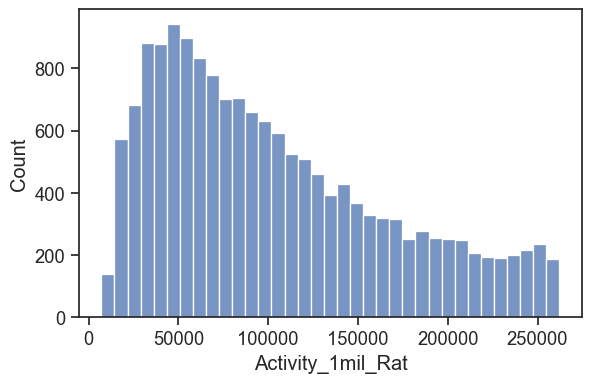

In [ ]:
sns.histplot(hummel['Activity_1mil_Rat'])

In [43]:
import numpy as np
np.median(hummel['Activity_500k_Rat'])

86603.846085

<Axes: xlabel='Activity_500k_Rat', ylabel='Count'>

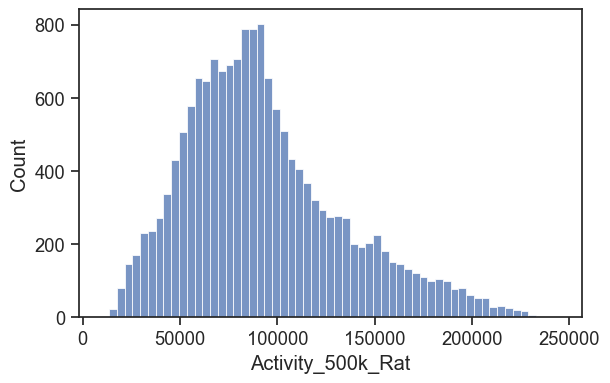

In [40]:
sns.histplot(hummel['Activity_500k_Rat'])

In [47]:
hummel_final = pd.read_csv("../data/hummel_20230208 Final_data_for_figures_unprocessed.csv")
hummel_final#["Activity_500k_Rat"].dropna()

,Unnamed: 0,index,DNA,Activity_1mil_G,reads_1mil_G,Activity_1mil_Rat,reads_1mil_Rat,Activity_500k_G,reads_500k_G,Activity_500k_R,...,reads_500k_Rat,Locus,Predicted_activation,Z-score,Position,protein,test,Max_overhangs,Final_length,Name
0,0,16637,TTAGCTGATACTAAAGATGTCGTCCCTGTTGATTTAGTTGACTTCG...,338.0,22.0,NaN,NaN,NaN,NaN,NaN,...,16.0,YGL245W,24.242592,7.822235,612.0,LADTKDVVPVDLVDFDHLITKDRLEEDESFEDFLTPQTEFHTDAIA...,LADTKDVVPVDLVDFDHLITKDRLEEDESFEDFLTPQTEFHTDAIA...,GCGGGCTCTACTTCATCGGCTAGCTTAGCTGATACTAAAGATGTCG...,204.0,YGL245W_3014
1,1,17057,GATGAATTAAGTCCAGAACAAGTAAATGACGTCAAAGATTTTCTGG...,338.0,23.0,NaN,NaN,338.0,19.0,NaN,...,51.0,AT5G18230.4,46.395610,9.414828,195.0,DELSPEQVNDVKDFLDDYVERNQDDFDEFSDVDELYSTLPLDEVEG...,DELSPEQVNDVKDFLDDYVERNQDDFDEFSDVDELYSTLPLDEVEG...,GCGGGCTCTACTTCATCGGCTAGCGATGAATTAAGTCCAGAACAAG...,204.0,AT5G18230.4_2190
2,2,16447,CAATCCACCGAATTCGCCGGAGATTTCCCTCCATTCGAAACAGAGT...,338.0,36.0,262143.0,30.0,NaN,NaN,NaN,...,12.0,AT3G16570.1,36.852043,8.849788,32.0,QSTEFAGDFPPFETECRGTIAECSVSAALGDGGDLFYGGGEMGEEF...,QSTEFAGDFPPFETECRGTIAECSVSAALGDGGDLFYGGGEMGEEF...,GCGGGCTCTACTTCATCGGCTAGCCAATCCACCGAATTCGCCGGAG...,204.0,AT3G16570.1_4102
3,3,17183,GATACTAAAGATGTCGTCCCTGTTGATTTAGTTGACTTCGACCATT...,338.0,13.0,262143.0,20.0,NaN,NaN,NaN,...,90.0,YGL245W,24.079853,7.805709,614.0,DTKDVVPVDLVDFDHLITKDRLEEDESFEDFLTPQTEFHTDAIADL...,DTKDVVPVDLVDFDHLITKDRLEEDESFEDFLTPQTEFHTDAIADL...,GCGGGCTCTACTTCATCGGCTAGCGATACTAAAGATGTCGTCCCTG...,204.0,YGL245W_3077
4,4,16920,AGCTTAGAACAGGAATGGACATTGATTCTTGATGACGAATTAGCGA...,338.0,19.0,NaN,NaN,NaN,NaN,NaN,...,71.0,AT5G37340.2,45.142406,9.347643,429.0,SLEQEWTLILDDELANSFISPVTDDIKDDHQLTFEEYERSWEQNEE...,SLEQEWTLILDDELANSFISPVTDDIKDDHQLTFEEYERSWEQNEE...,GCGGGCTCTACTTCATCGGCTAGCAGCTTAGAACAGGAATGGACAT...,204.0,AT5G37340.2_2379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17774,17778,17777,GGCGCAGGTGATGAACTTGATTACGAATTCGTCGGTGCTGATCTAG...,14013.0,46.0,NaN,NaN,NaN,NaN,NaN,...,18.0,YEL040W,33.763443,8.635021,162.0,GAGDELDYEFVGADLETAQTNFYWESVLNYTNSANISTTDTFENYH...,GAGDELDYEFVGADLETAQTNFYWESVLNYTNSANISTTDTFENYH...,GCGGGCTCTACTTCATCGGCTAGCGGCGCAGGTGATGAACTTGATT...,204.0,YEL040W_1171
17775,17779,17778,AAAAGACTGGGTGCGAAAGGAATTCAAGAAATTAAAGATCACCCTT...,14013.0,17.0,NaN,NaN,338.0,15.0,NaN,...,39.0,YFL033C,17.791760,7.063162,1238.0,KRLGAKGIQEIKDHPYFKNVDWDHVYDEEASFVPTIDNPEDTDYFD...,KRLGAKGIQEIKDHPYFKNVDWDHVYDEEASFVPTIDNPEDTDYFD...,GCGGGCTCTACTTCATCGGCTAGCAAAAGACTGGGTGCGAAAGGAA...,204.0,YFL033C_5949
17776,17780,17779,AAACTAGGGTATGAAGAAGATAATGGGGTTGGTAACGAGTTTTCAT...,14013.0,12.0,NaN,NaN,NaN,NaN,NaN,...,NaN,AT5G01060.1,30.764595,8.406805,373.0,KLGYEEDNGVGNEFSFQMWTGEMQENMDYKKHGDAAFLAKDFDTAI...,KLGYEEDNGVGNEFSFQMWTGEMQENMDYKKHGDAAFLAKDFDTAI...,GCGGGCTCTACTTCATCGGCTAGCAAACTAGGGTATGAAGAAGATA...,204.0,AT5G01060.1_6350
17777,17781,17780,GGTATGACCAAGGAAGAGCTTGATTTCATTAGTCTTCTTGAAGATG...,14013.0,12.0,NaN,NaN,NaN,NaN,NaN,...,NaN,AT2G26660.1,21.437895,7.520567,62.0,GMTKEELDFISLLEDELEKFNSFFVEQEEEYIIRLKELKDQVAKAK...,GMTKEELDFISLLEDELEKFNSFFVEQEEEYIIRLKELKDQVAKAK...,GCGGGCTCTACTTCATCGGCTAGCGGTATGACCAAGGAAGAGCTTG...,204.0,AT2G26660.1_11091


<Axes: xlabel='Activity_500k_Rat', ylabel='Count'>

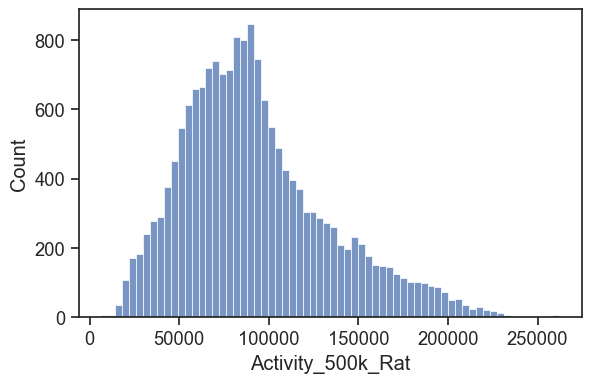

In [ ]:
# Removing duplicate tiles and nulls
sns.histplot(hummel_final.drop_duplicates(subset = "DNA").dropna(subset = "Activity_500k_Rat")["Activity_500k_Rat"])